In [3]:
# Importamos las bibliotecas de preprocesado de datos
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.preprocessing import image

# Cargamos el modelo
model = tf.keras.models.load_model('chihuahua_or_muffin.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 7, 7, 10)       │        46,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,857,997 (56.68 MB)

 Trainable params: 47,769 (186.60 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 95,540 (373.21 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


<Figure size 640x480 with 0 Axes>

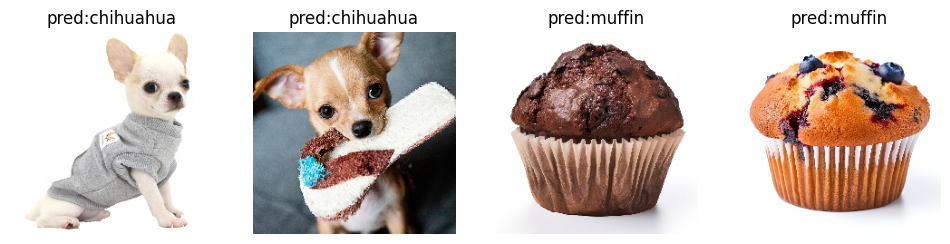

In [4]:
# Procesado y predicción de imágenes

images = ['test_1.jpg','test_2.jpg','test_3.jpg','test_4.jpg']
labels = ["chihuahua", "muffin"]
size = len(images)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, size, figsize=(size*3, 4))

i = 0

for test_img in images:
  img_path = 'final_test/'+ test_img
  img = image.load_img(img_path, target_size=(224, 224)) 
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor)
  predict_class = (confidence > 0.5).astype("int32")
  axarr[i].set_title("pred:" + labels[predict_class[0][0]])
  axarr[i].imshow(img)
  axarr[i].axis("off")
  i = i + 1

#print(prediction)

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
[[1.]]
class  1 confidence
muffin


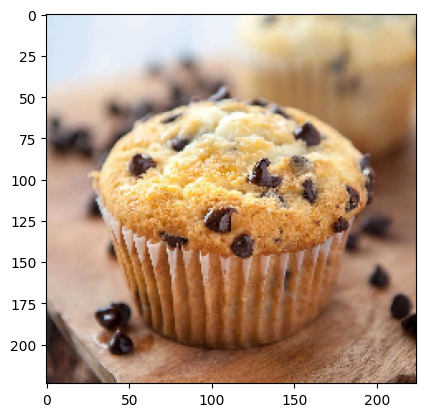

In [5]:
# Con una sola img
test_img = 'test_5.jpg'
img_path = 'final_test/'+ test_img   #image to be tested

#image preprocessing to be used
img = image.load_img(img_path, target_size=(224, 224)) 
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

#model response

confidence = model.predict(img_tensor)
predict_class = (confidence > 0.5).astype("int32")
print (confidence)
print ("class ", predict_class[0][0], "confidence", )

if predict_class[0][0] == 1:
  print("muffin")
else:
  print("chihuahua")

plt.imshow(img_tensor[0])
plt.show()